## This notebook goal is to preprocess ECG data by applying those methods
- Mean removal
- Bandpass Filter (Butterworth 1 to 40 HZ)
- Normalization
- Resampling
- Segmention (round 4 heartbeats a segmant)

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt 

In [3]:
from pylab import rcParams
from scipy import signal
rcParams['figure.figsize'] = 100, 10

In [4]:
data =  np.fromfile('../Data/biometrics/train/s1.txt', sep='\n')

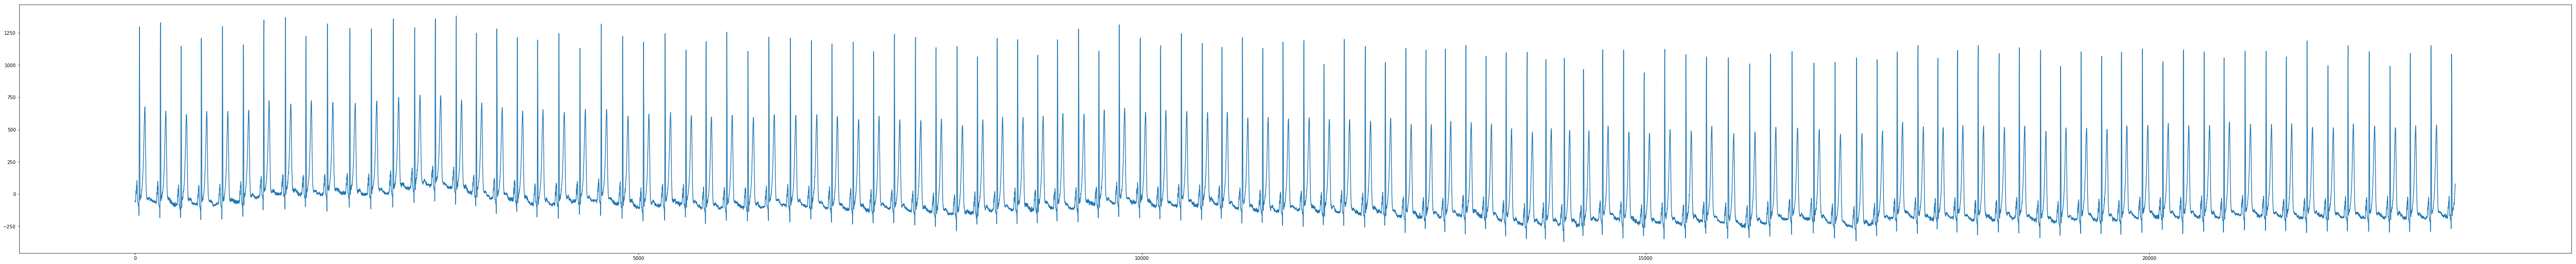

In [5]:
plt.plot(data)
plt.show()

In [6]:
data.mean()

0.4439670138888889

In [7]:
def remove_mean(data):
    """Remove mean value from numpy array
    @param: numpy array
    @return: numpy array after mean removal
    """
    return data-data.mean()

In [8]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    """Genarate butterworth bandpass filter
    @param: lowcut frequancy
    @param: highcut frequancy
    @param: sampling frequancy
    @param: filter order
    @return: return the filter in second-order sections form
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = signal.butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

In [9]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    """ِApply butterworth bandpass filter
    @param: the signal to be proccessed
    @param: lowcut frequancy
    @param: highcut frequancy
    @param: sampling frequancy
    @param: filter order
    @return: return filterd signal
    """
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.sosfilt(sos, data)
    return y

In [10]:
def norm(data):
    """ِNormilaze data between [-1,1]
    @return: Normilized data
    """
    min_sample =data.min()
    max_sample =data.max()
    return (((data-min_sample)/(max_sample-min_sample))-0.5)*2

In [12]:
#should tweak order from 1-4 for the best result
def preprocess(data,out_samples_num,fs=1000, lowcut=1, highcut=40, order=4):
    """ِPreprocess the signal
    @param: the signal to be proccessed
    @param: the number of samples after downsampling the signal
    @param: sampling frequancy
    @param: lowcut frequancy
    @param: highcut frequancy
    @param: filter order
    @return: preprocess signal signal
    """
    data = remove_mean(data)
    data = butter_bandpass_filter(data, lowcut, highcut, fs, order)
    data=signal.resample(data,out_samples_num)
    data=norm(data)
    
    
    
    
    
